In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain_V2.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest_V2.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain_V2.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest_V2.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)

parameters = {'C': [1e-3,1e-2,0.1,1], 'gamma': ['scale','auto'],'kernel': ['rbf', 'poly']}


svc=SVC()
cv = GridSearchCV(svc, param_grid=parameters, cv=Kcv)

In [4]:
%%time
#best params found by grid search
cv.fit(X_train,y_train)
cv.best_params_

CPU times: user 2min 36s, sys: 329 ms, total: 2min 36s
Wall time: 2min 36s


{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [5]:
%%time
svc.set_params(**cv.best_params_)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.3587409650544016, recall: 0.3359375, f1score: 0.34451406432186293
CPU times: user 500 ms, sys: 1.38 ms, total: 501 ms
Wall time: 500 ms


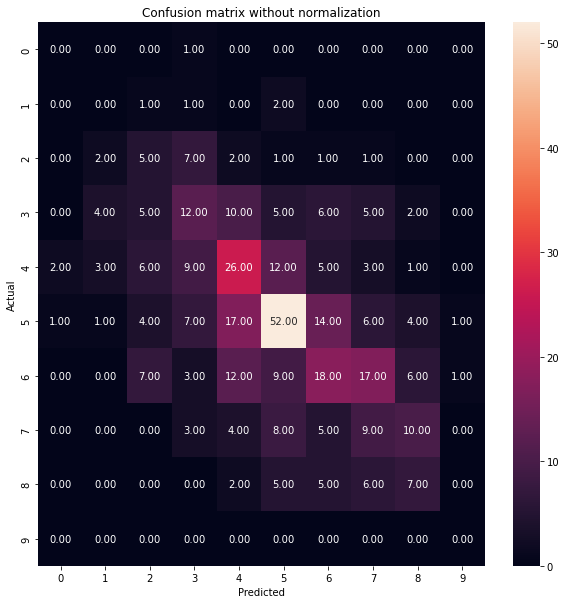

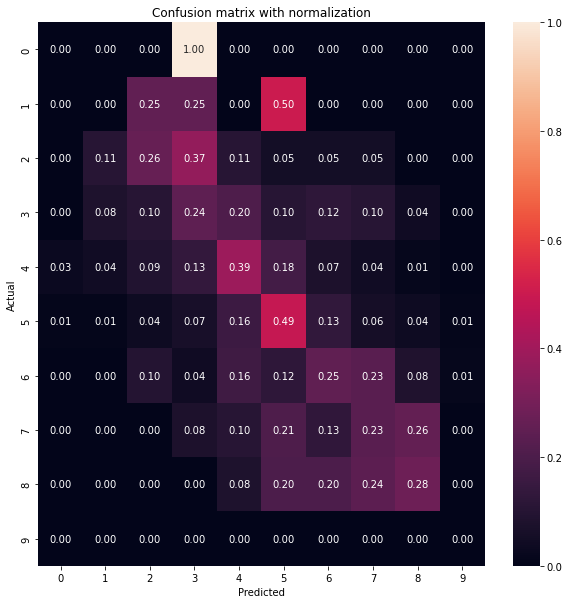

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [9]:
print('training data')
print(classification_report(y_train, svc.predict(X_train)))

print('test data')
print(classification_report(y_test, svc.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       351
         1.0       0.97      1.00      0.99       351
         2.0       0.84      0.97      0.90       351
         3.0       0.85      0.84      0.85       351
         4.0       0.76      0.77      0.77       351
         5.0       0.85      0.70      0.76       351
         6.0       0.81      0.80      0.81       351
         7.0       0.85      0.81      0.83       351
         8.0       0.90      0.95      0.92       351
         9.0       1.00      1.00      1.00       351
        10.0       1.00      1.00      1.00       351

    accuracy                           0.89      3861
   macro avg       0.89      0.89      0.89      3861
weighted avg       0.89      0.89      0.89      3861

test data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         4
